---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_stat_cluster.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a> -->

## ✨ Clustering.

## Requirements

In [1]:
# install extra requirements
# !pip install roux[stat]

In [2]:
## common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Gaussian-Mixture Model

### Demo data

In [3]:
def get_gmm_data(n = 1000,norm_params=[[5, 1],[9, 1.3]]):
    """Generate gaussian mixture data. Reference: https://stackoverflow.com/a/49110597/18032765"""
    import scipy.stats as sc
    # Set-up.
    np.random.seed(0)
    # Parameters of the mixture components
    norm_params = np.array(norm_params)
    n_components = norm_params.shape[0]
    # Weight of each component, in this case all of them are 1/n_components
    weights = np.ones(n_components, dtype=np.float64) / n_components
    # A stream of indices from which to choose the component
    mixture_idx = np.random.choice(len(weights), size=n, replace=True, p=weights)
    # y is the mixture sample
    y = np.fromiter((sc.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                       dtype=np.float64)
    return pd.Series(y)
data=get_gmm_data()

### 1D clustering

0it [00:00, ?it/s]

INFO:root:Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0
scipy     : 1.7.3
pandas    : 1.4.2
numpy     : 1.21.5
json      : 2.0.9
sys       : 3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]
seaborn   : 0.11.2
matplotlib: 3.5.1
re        : 2.2.1
tqdm      : 4.64.0
logging   : 0.5.1.2
yaml      : 6.0



INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


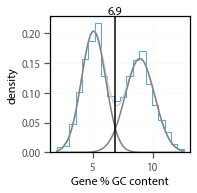

In [4]:
from roux.stat.cluster import cluster_1d
d1=cluster_1d(
    ds=data,
    n_clusters=2,
    clf_type='gmm',
    random_state=0,
    returns=['coff','mix_pdf','two_pdfs','weights'],
    ax=None,
    bins=60,
    test=True,
)
ax=plt.gca()
_=ax.set(xlabel='Gene % GC content',ylabel='density')

In [5]:
# for testing
assert d1['coff']==6.894832022233195, d1['coff']

## Documentation
[`roux.stat.cluster`](https://github.com/rraadd88/roux#module-rouxstatcluster)